# Programming Assignment-1

Biuld a CNN model to classify the MNIST handwrittendigits dataset.


*   Try to get an accuracy over 98.2%
*   Use different loss function (Adam, SGD, RMSProp)
*   Analyze the affect of using and not using data normalization. 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

## Adam with Normalization

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
X_train = X_train.reshape(-1, 28,28,1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28,28,1).astype("float32") / 255.0

In [4]:
model_1 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [5]:
model_1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [6]:
h = model_1.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 9s 4ms/step - loss: 0.2116 - accuracy: 0.9348 - val_loss: 0.0823 - val_accuracy: 0.9757
Epoch 2/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9797 - val_loss: 0.0564 - val_accuracy: 0.9832
Epoch 3/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9854 - val_loss: 0.0524 - val_accuracy: 0.9837
Epoch 4/5
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.0461 - val_accuracy: 0.9866
Epoch 5/5
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0460 - val_accuracy: 0.9864


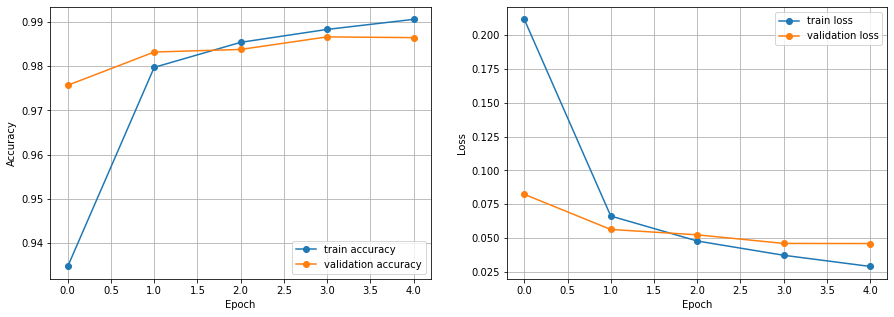

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [8]:
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0386 - accuracy: 0.9870

Test Loss: 0.03860582038760185

Test Accuracy: 0.9869999885559082


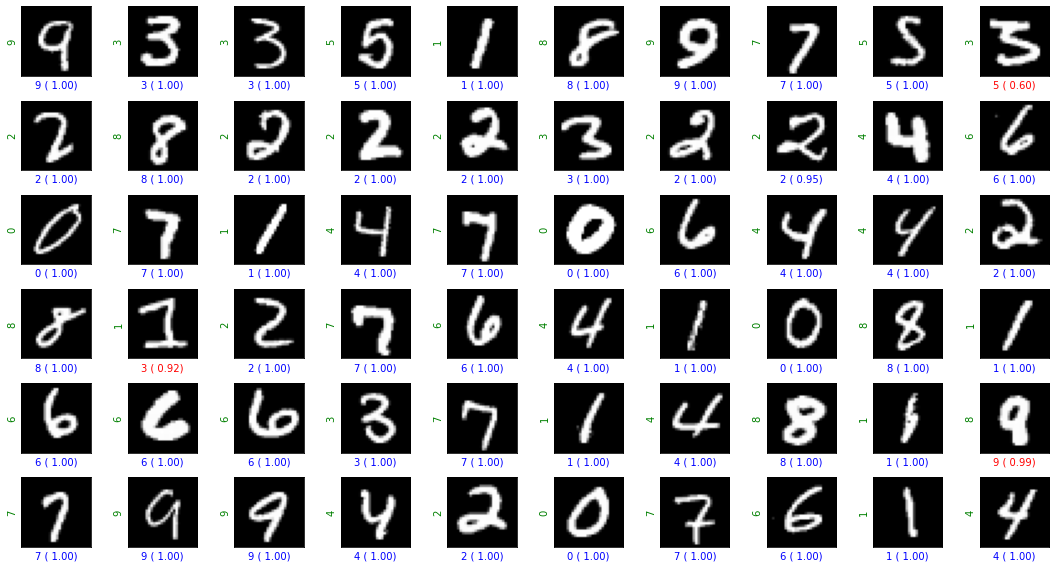

In [9]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model_1.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

Using `adam` in **normaliztion** the data, I find the accuracy in validation data ***98.64%*** and error in validation data ***4.60%***. In test data the accuracy is ***98.69%***.

## Adam without Normalization

In [10]:
(X2_train, Y2_train), (X2_test, Y2_test) = mnist.load_data()
print(X2_train.shape, Y2_train.shape)
print(X2_test.shape, Y2_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [11]:
X2_train, X2_test = X2_train.reshape(-1, 28,28,1), X2_test.reshape(-1, 28,28,1)

In [12]:
model_2 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [13]:
model_2.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [14]:
h2 = model_2.fit(x=X2_train, y=Y2_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 7s 4ms/step - loss: 0.2953 - accuracy: 0.9239 - val_loss: 0.1146 - val_accuracy: 0.9649
Epoch 2/5
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0905 - accuracy: 0.9727 - val_loss: 0.0824 - val_accuracy: 0.9751
Epoch 3/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0746 - accuracy: 0.9780 - val_loss: 0.0604 - val_accuracy: 0.9821
Epoch 4/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0576 - accuracy: 0.9831 - val_loss: 0.0617 - val_accuracy: 0.9825
Epoch 5/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9843 - val_loss: 0.0614 - val_accuracy: 0.9835


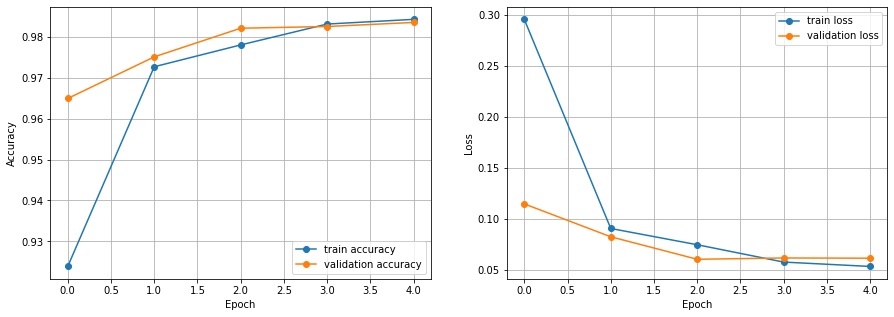

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [16]:
test_loss, test_acc = model_2.evaluate(X2_test, Y2_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0585 - accuracy: 0.9836

Test Loss: 0.0584840402007103

Test Accuracy: 0.9836000204086304


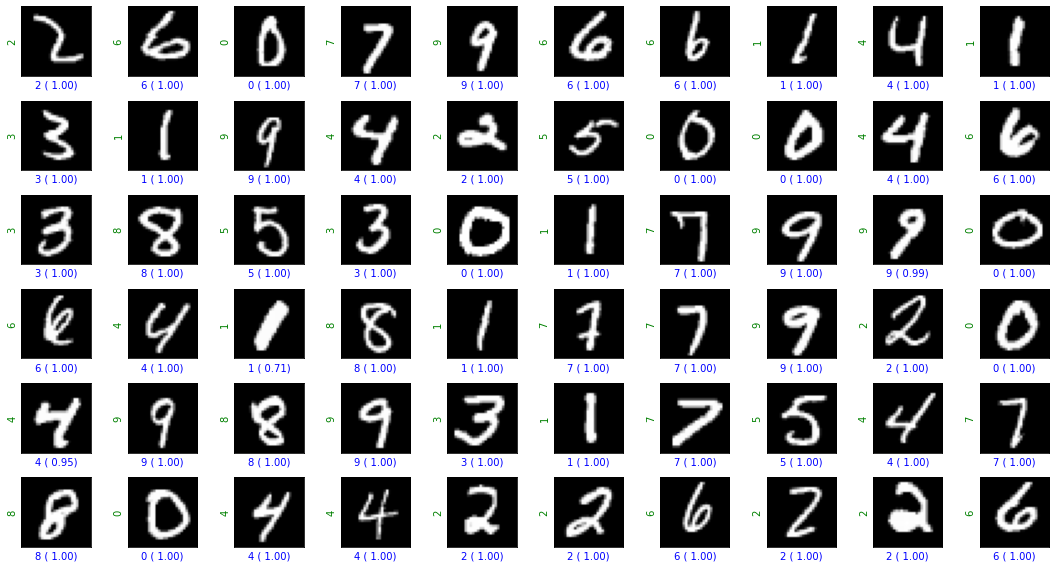

In [17]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X2_test.shape[0]), ROWS*COLS)
sample_images = X2_test[random_indices, :]
sample_labels = Y2_test[random_indices]
predictions = model_2.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

Using `adam` **without normaliztion** data, I find the accuracy in validation data ***98.35%*** and error in validation data ***6.14%***. In test data the accuracy is ***98.36%***.


## SGD with Normalization

In [18]:
(X3_train, Y3_train), (X3_test, Y3_test) = mnist.load_data()
print(X3_train.shape, Y3_train.shape)
print(X3_test.shape, Y3_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [19]:
X3_train = X3_train.reshape(-1, 28,28,1).astype("float32") / 255.0
X3_test = X3_test.reshape(-1, 28,28,1).astype("float32") / 255.0

In [20]:
model_3 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [21]:
model_3.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [22]:
h3 = model_3.fit(x=X3_train, y=Y3_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 6s 4ms/step - loss: 0.8823 - accuracy: 0.7215 - val_loss: 0.2789 - val_accuracy: 0.9131
Epoch 2/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.1828 - accuracy: 0.9437 - val_loss: 0.1402 - val_accuracy: 0.9575
Epoch 3/5
1715/1715 [==============================] - 6s 3ms/step - loss: 0.1251 - accuracy: 0.9612 - val_loss: 0.1246 - val_accuracy: 0.9628
Epoch 4/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0998 - accuracy: 0.9692 - val_loss: 0.1065 - val_accuracy: 0.9688
Epoch 5/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0844 - accuracy: 0.9742 - val_loss: 0.0824 - val_accuracy: 0.9745


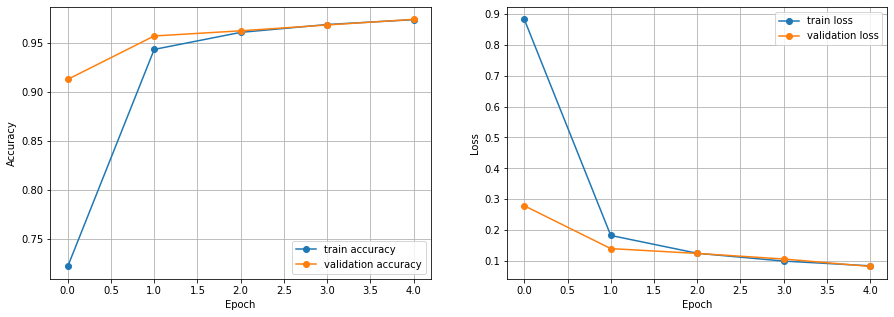

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [24]:
test_loss, test_acc = model_3.evaluate(X3_test, Y3_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9771

Test Loss: 0.07482117414474487

Test Accuracy: 0.9771000146865845


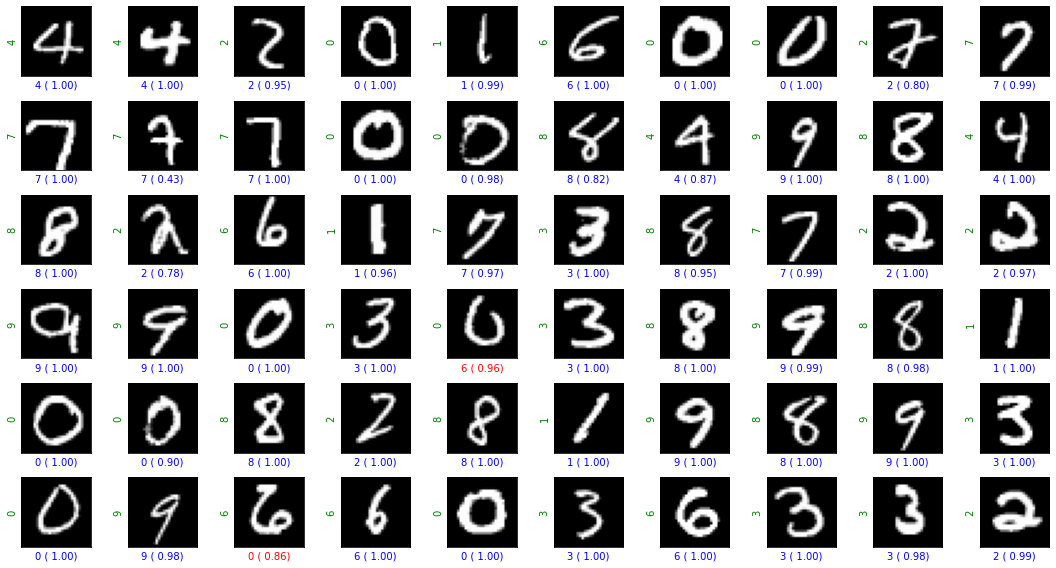

In [25]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X3_test.shape[0]), ROWS*COLS)
sample_images = X3_test[random_indices, :]
sample_labels = Y3_test[random_indices]
predictions = model_3.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

Using `SGD` in **normaliztion** data, I find the accuracy in validation data ***97.45%*** and error in validation data ***8.24%***. In test data the accuracy is ***97.71%***.

## SGD without Normalization

In [26]:
(X4_train, Y4_train), (X4_test, Y4_test) = mnist.load_data()
print(X4_train.shape, Y4_train.shape)
print(X4_test.shape, Y4_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [27]:
X4_train, X4_test = X4_train.reshape(-1, 28,28,1), X4_test.reshape(-1, 28,28,1)

In [28]:
model_4 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [29]:
model_4.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [30]:
h4 = model_4.fit(x=X4_train, y=Y4_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 6s 3ms/step - loss: 1.0097 - accuracy: 0.7857 - val_loss: 0.1639 - val_accuracy: 0.9505
Epoch 2/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.1663 - accuracy: 0.9506 - val_loss: 0.1289 - val_accuracy: 0.9599
Epoch 3/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.1125 - accuracy: 0.9658 - val_loss: 0.1254 - val_accuracy: 0.9619
Epoch 4/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0900 - accuracy: 0.9729 - val_loss: 0.0821 - val_accuracy: 0.9768
Epoch 5/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0760 - accuracy: 0.9762 - val_loss: 0.0780 - val_accuracy: 0.9781


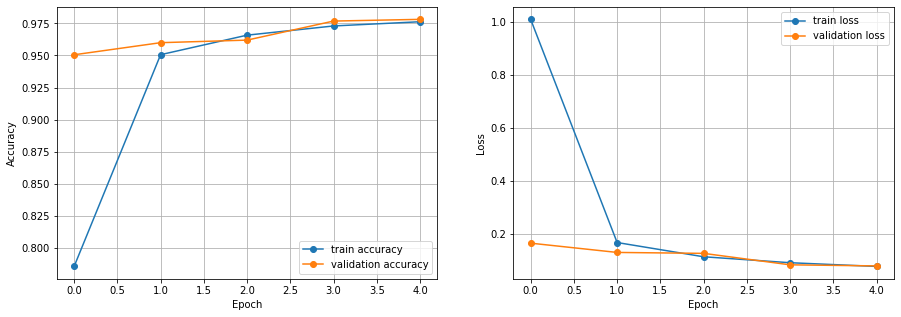

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h4.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h4.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h4.history['loss'], 'o-', label='train loss')
plt.plot(h4.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [32]:
test_loss, test_acc = model_4.evaluate(X4_test, Y4_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9764

Test Loss: 0.07596317678689957

Test Accuracy: 0.9764000177383423


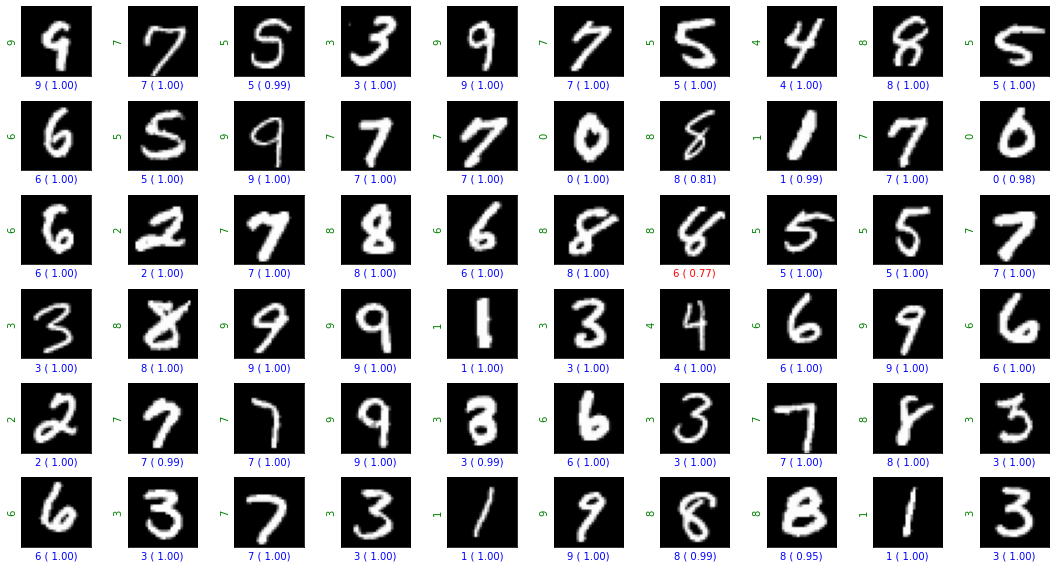

In [33]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X4_test.shape[0]), ROWS*COLS)
sample_images = X4_test[random_indices, :]
sample_labels = Y4_test[random_indices]
predictions = model_4.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

Using `SGD` **without normaliztion** the data, I find the accuracy in validation data ***97.81%*** and error in validation data ***7.80%***. In test data the accuracy is ***97.64%***.

## RMSProp with Normalization

In [34]:
(X5_train, Y5_train), (X5_test, Y5_test) = mnist.load_data()
print(X5_train.shape, Y5_train.shape)
print(X5_test.shape, Y5_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [35]:
X5_train = X5_train.reshape(-1, 28,28,1).astype("float32") / 255.0
X5_test = X5_test.reshape(-1, 28,28,1).astype("float32") / 255.0

In [36]:
model_5 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)               

In [37]:
model_5.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [38]:
h5 = model_5.fit(x=X5_train, y=Y5_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 7s 4ms/step - loss: 0.2065 - accuracy: 0.9358 - val_loss: 0.0762 - val_accuracy: 0.9768
Epoch 2/5
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0616 - accuracy: 0.9815 - val_loss: 0.0554 - val_accuracy: 0.9852
Epoch 3/5
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0440 - accuracy: 0.9867 - val_loss: 0.0466 - val_accuracy: 0.9865
Epoch 4/5
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0359 - accuracy: 0.9896 - val_loss: 0.0561 - val_accuracy: 0.9852
Epoch 5/5
1715/1715 [==============================] - 7s 4ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.0460 - val_accuracy: 0.9887


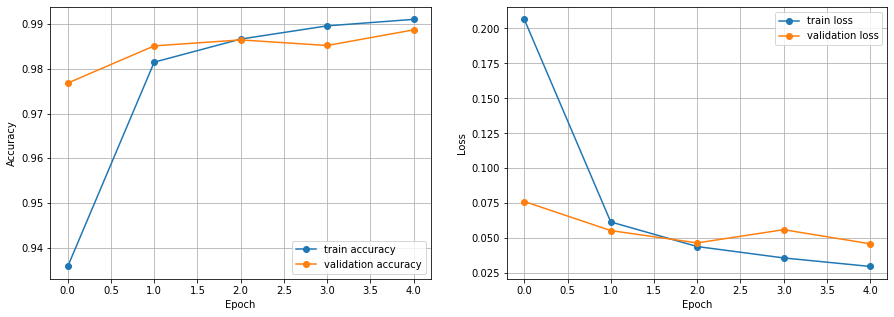

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h5.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h5.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h5.history['loss'], 'o-', label='train loss')
plt.plot(h5.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [40]:
test_loss, test_acc = model_5.evaluate(X5_test, Y5_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0394 - accuracy: 0.9887

Test Loss: 0.039385393261909485

Test Accuracy: 0.9886999726295471


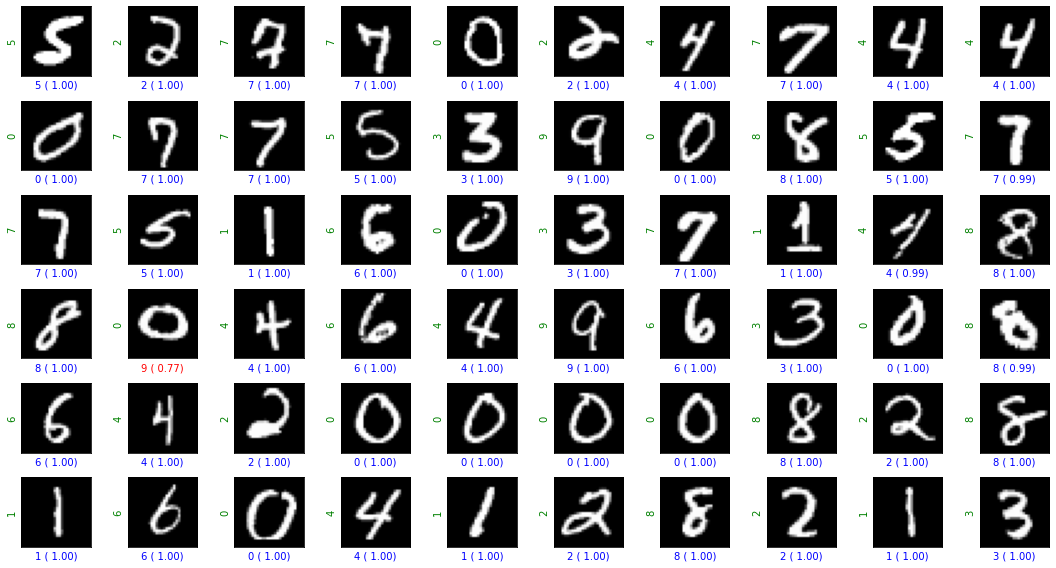

In [41]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X5_test.shape[0]), ROWS*COLS)
sample_images = X5_test[random_indices, :]
sample_labels = Y5_test[random_indices]
predictions = model_5.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

Using `RMSProp` in **normaliztion** data, I find the accuracy in validation data ***98.87%*** and error in validation data ***4.60%***. In test data the accuracy is ***98.86%***.

## RMSProp without Normalization

In [42]:
(X6_train, Y6_train), (X6_test, Y6_test) = mnist.load_data()
print(X6_train.shape, Y6_train.shape)
print(X6_test.shape, Y6_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [43]:
X6_train, X6_test = X6_train.reshape(-1, 28,28,1), X6_test.reshape(-1, 28,28,1)

In [44]:
model_6 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)               

In [45]:
model_6.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [46]:
h6 = model_6.fit(x=X6_train, y=Y6_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 7s 4ms/step - loss: 0.3481 - accuracy: 0.9185 - val_loss: 0.1379 - val_accuracy: 0.9632
Epoch 2/5
1715/1715 [==============================] - 6s 4ms/step - loss: 0.1076 - accuracy: 0.9723 - val_loss: 0.0847 - val_accuracy: 0.9803
Epoch 3/5
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0983 - accuracy: 0.9769 - val_loss: 0.0913 - val_accuracy: 0.9776
Epoch 4/5
1715/1715 [==============================] - 6s 4ms/step - loss: 0.0913 - accuracy: 0.9792 - val_loss: 0.0831 - val_accuracy: 0.9835
Epoch 5/5
1715/1715 [==============================] - 6s 4ms/step - loss: 0.1031 - accuracy: 0.9794 - val_loss: 0.1010 - val_accuracy: 0.9785


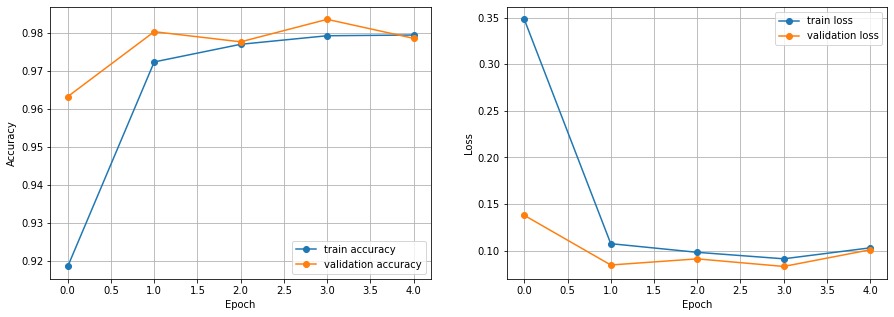

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h6.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h6.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h6.history['loss'], 'o-', label='train loss')
plt.plot(h6.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [48]:
test_loss, test_acc = model_6.evaluate(X6_test, Y6_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0874 - accuracy: 0.9795

Test Loss: 0.08739173412322998

Test Accuracy: 0.9794999957084656


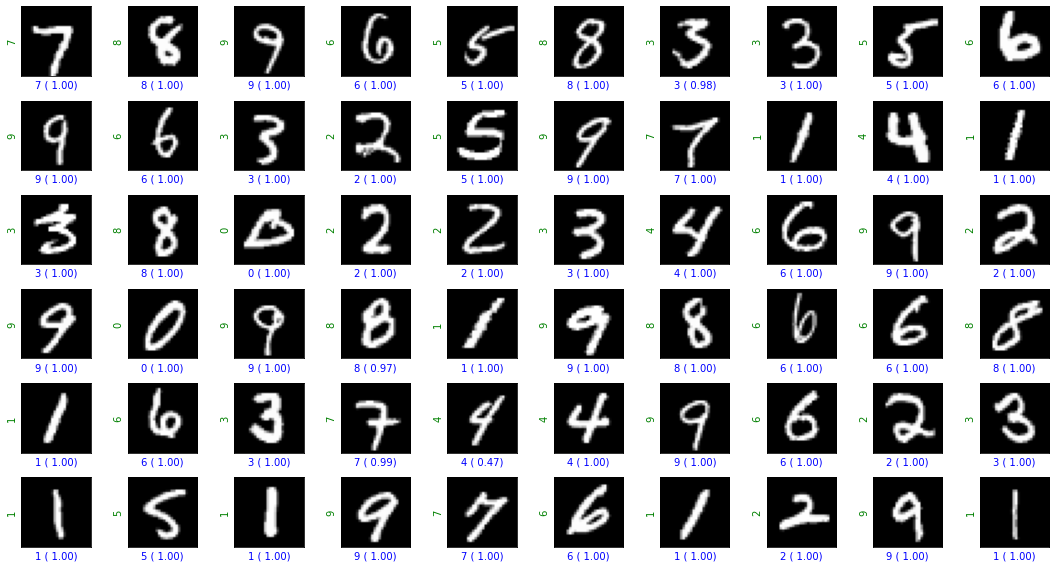

In [49]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X6_test.shape[0]), ROWS*COLS)
sample_images = X6_test[random_indices, :]
sample_labels = Y6_test[random_indices]
predictions = model_6.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

Using `RMSProp` **without normaliztion** the data, I find the accuracy in validation data ***97.85%*** and error in validation data ***10.10%***. In test data the accuracy is ***97.94%***.